In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
df = pd.read_csv('alarms+weather.csv')

In [3]:
df['start_time'] = pd.to_datetime(df['start_time'], errors='coerce')
df['end_time'] = pd.to_datetime(df['end_time'], errors='coerce')

In [4]:
df['duration_hours'] = (df['end_time'] - df['start_time']).dt.total_seconds() / 3600

In [5]:
df['day_of_week'] = df['start_time'].dt.day_name()

In [6]:
print("Number of rows and columns:", df.shape)
print("\nList of columns:\n", df.columns.tolist())

Number of rows and columns: (51327, 45)

List of columns:
 ['city_address', 'day_tempmax', 'day_tempmin', 'day_temp', 'day_dew', 'day_humidity', 'day_precip', 'day_precipcover', 'day_snow', 'day_windgust', 'day_windspeed', 'day_winddir', 'day_pressure', 'day_cloudcover', 'day_visibility', 'day_solarradiation', 'day_solarenergy', 'day_uvindex', 'day_sunrise', 'day_sunset', 'day_conditions', 'hour_temp', 'hour_humidity', 'hour_precip', 'hour_precipprob', 'hour_snow', 'hour_windgust', 'hour_windspeed', 'hour_winddir', 'hour_pressure', 'hour_visibility', 'hour_cloudcover', 'hour_solarradiation', 'hour_solarenergy', 'hour_uvindex', 'hour_conditions', 'year', 'month', 'day', 'hour', 'start_time', 'end_time', 'city', 'duration_hours', 'day_of_week']


In [7]:
print("\n🧬 Column data types:\n")
print(df.dtypes)


🧬 Column data types:

city_address                   object
day_tempmax                   float64
day_tempmin                   float64
day_temp                      float64
day_dew                       float64
day_humidity                  float64
day_precip                    float64
day_precipcover               float64
day_snow                      float64
day_windgust                  float64
day_windspeed                 float64
day_winddir                   float64
day_pressure                  float64
day_cloudcover                float64
day_visibility                float64
day_solarradiation            float64
day_solarenergy               float64
day_uvindex                   float64
day_sunrise                    object
day_sunset                     object
day_conditions                 object
hour_temp                     float64
hour_humidity                 float64
hour_precip                   float64
hour_precipprob               float64
hour_snow                  

In [8]:
numeric_cols = df.select_dtypes(include=np.number).columns.tolist()
print(f"\nNumber of numeric columns: {len(numeric_cols)}")


Number of numeric columns: 36


In [9]:
print("\nBasic statistics of numeric columns:\n")
print(df[numeric_cols].describe().T)


Basic statistics of numeric columns:

                       count         mean         std          min  \
day_tempmax          51327.0    16.038325   10.908033   -14.300000   
day_tempmin          51327.0     6.780296    8.568881   -50.300000   
day_temp             51327.0    11.409146    9.621696   -17.500000   
day_dew              51327.0     5.191961    7.655890   -20.700000   
day_humidity         51327.0    69.750202   15.328893    23.300000   
day_precip           51327.0     2.189350   14.544502     0.000000   
day_precipcover      51327.0     6.145212   12.323406     0.000000   
day_snow             51327.0     0.094920    0.593518     0.000000   
day_windgust         51327.0    34.873786   10.988480     6.500000   
day_windspeed        51327.0    18.635943    6.664901     3.600000   
day_winddir          51327.0   181.881891  106.360992     0.000000   
day_pressure         51327.0  1016.993003    8.170407   984.300000   
day_cloudcover       51327.0    60.381571   30.0464

In [10]:
print("\nNumber of missing values per column:\n")
print(df.isnull().sum())


Number of missing values per column:

city_address           0
day_tempmax            0
day_tempmin            0
day_temp               0
day_dew                0
day_humidity           0
day_precip             0
day_precipcover        0
day_snow               0
day_windgust           0
day_windspeed          0
day_winddir            0
day_pressure           0
day_cloudcover         0
day_visibility         0
day_solarradiation     0
day_solarenergy        0
day_uvindex            0
day_sunrise            0
day_sunset             0
day_conditions         0
hour_temp              0
hour_humidity          0
hour_precip            0
hour_precipprob        0
hour_snow              0
hour_windgust          0
hour_windspeed         0
hour_winddir           0
hour_pressure          0
hour_visibility        0
hour_cloudcover        0
hour_solarradiation    0
hour_solarenergy       0
hour_uvindex           0
hour_conditions        0
year                   0
month                  0
day        

In [11]:
print("\nPotential anomalies (below 1% or above 99% percentile):\n")
for col in numeric_cols:
    q1 = df[col].quantile(0.01)
    q99 = df[col].quantile(0.99)
    outliers = df[(df[col] < q1) | (df[col] > q99)][col]
    print(f"{col}: {len(outliers)} anomalous values")


Potential anomalies (below 1% or above 99% percentile):

day_tempmax: 999 anomalous values
day_tempmin: 994 anomalous values
day_temp: 1019 anomalous values
day_dew: 969 anomalous values
day_humidity: 1002 anomalous values
day_precip: 512 anomalous values
day_precipcover: 495 anomalous values
day_snow: 487 anomalous values
day_windgust: 977 anomalous values
day_windspeed: 754 anomalous values
day_winddir: 1022 anomalous values
day_pressure: 1012 anomalous values
day_cloudcover: 0 anomalous values
day_visibility: 870 anomalous values
day_solarradiation: 1028 anomalous values
day_solarenergy: 950 anomalous values
day_uvindex: 2 anomalous values
hour_temp: 1022 anomalous values
hour_humidity: 1021 anomalous values
hour_precip: 514 anomalous values
hour_precipprob: 0 anomalous values
hour_snow: 489 anomalous values
hour_windgust: 977 anomalous values
hour_windspeed: 973 anomalous values
hour_winddir: 1025 anomalous values
hour_pressure: 1026 anomalous values
hour_visibility: 890 anomalous

In [12]:
cat_cols = df.select_dtypes(include='object').columns.tolist()
print("\nUnique values in categorical columns:\n")
for col in cat_cols:
    print(f"{col}: {df[col].nunique()} unique")


Unique values in categorical columns:

city_address: 20 unique
day_sunrise: 9404 unique
day_sunset: 11132 unique
day_conditions: 982 unique
hour_conditions: 1659 unique
city: 20 unique
day_of_week: 7 unique


In [13]:
if 'day_conditions' in df.columns:
    print("\n☁️ Unique values for day_conditions:\n")
    print(df['day_conditions'].value_counts())


☁️ Unique values for day_conditions:

day_conditions
Partially cloudy,Partially cloudy                                                                                                               7723
Partially cloudy                                                                                                                                6044
Rain, Partially cloudy,Rain, Partially cloudy                                                                                                   5361
Rain, Partially cloudy                                                                                                                          4076
Clear,Clear                                                                                                                                     2899
                                                                                                                                                ... 
Snow, Partially cloudy,Snow, Partially cloudy,Snow, 

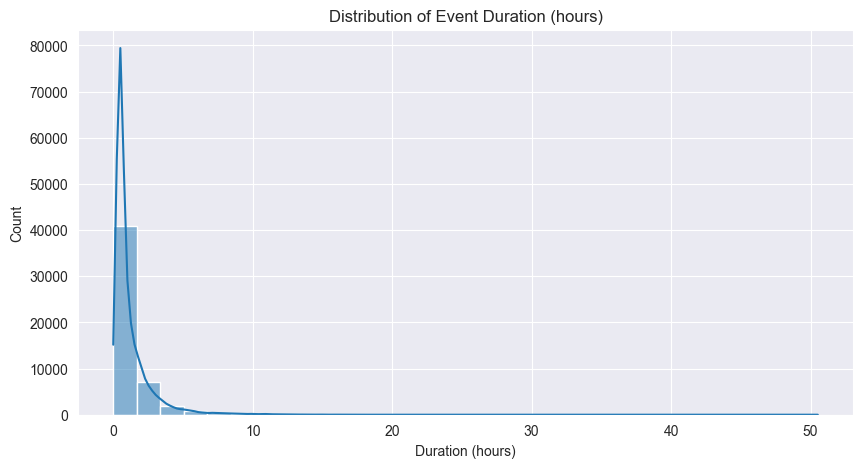

In [14]:
plt.figure(figsize=(10, 5))
sns.histplot(df['duration_hours'], bins=30, kde=True)
plt.title('Distribution of Event Duration (hours)')
plt.xlabel('Duration (hours)')
plt.ylabel('Count')
plt.show()

1. The graphic illustrates the distribution of event durations in hours. It reveals how frequently events of different durations occur in the dataset.

Most events have a relatively short duration. The high bars and the peak of the KDE curve on the left side indicate that a large number of events last for only a few hours or less.

The distribution is right-skewed. The tail of the histogram and the KDE curve extends towards longer durations, but the frequency of these longer-duration events is significantly lower. 
This suggests that while some events can last for a considerable amount of time, they are less common.

The KDE curve provides a smoothed estimate of the probability of an event having a specific duration.

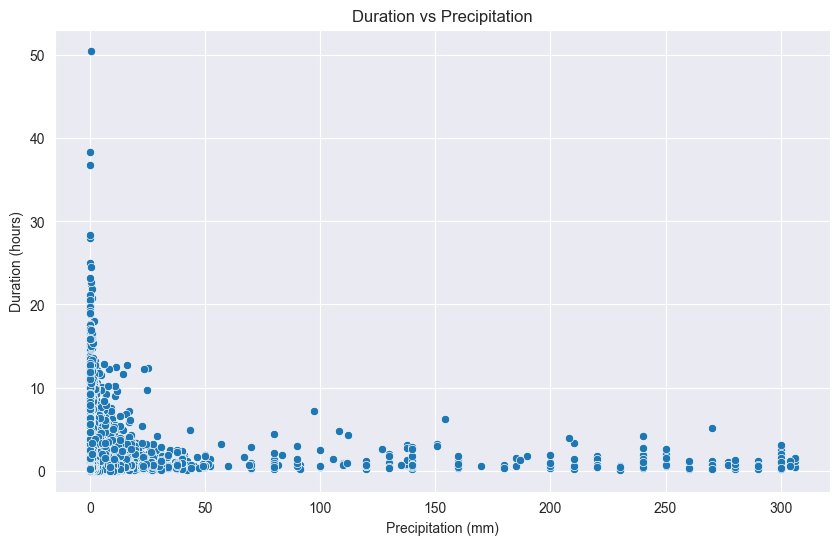

In [15]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='day_precip', y='duration_hours')
plt.title('Duration vs Precipitation')
plt.xlabel('Precipitation (mm)')
plt.ylabel('Duration (hours)')
plt.show()

2. The scatter plot illustrates the relationship between the amount of precipitation during the day and the duration of events. By observing the distribution of the dots, we can get an idea of whether there is any correlation or pattern between these two variables.

A very large number of events occurred on days with low precipitation (close to 0 mm). This is evident from the dense cluster of points near the left side of the plot. These events have a wide range of durations, mostly below 20 hours, but with some outliers extending to longer durations.

As the amount of precipitation increases, the number of events appears to decrease significantly. The density of points becomes much sparser as you move to the right along the x-axis.

There doesn't seem to be a clear positive or negative linear correlation between the amount of precipitation and the duration of events for the majority of the data. Events with both short and longer durations can occur on days with varying levels of precipitation (though longer durations are less frequent overall).

There are a few outliers with very long durations (e.g., around 50 hours) that occurred on days with relatively low precipitation.

The spread of durations at different precipitation levels: 
Outliers: Isolated events with unusual combinations of precipitation and duration.

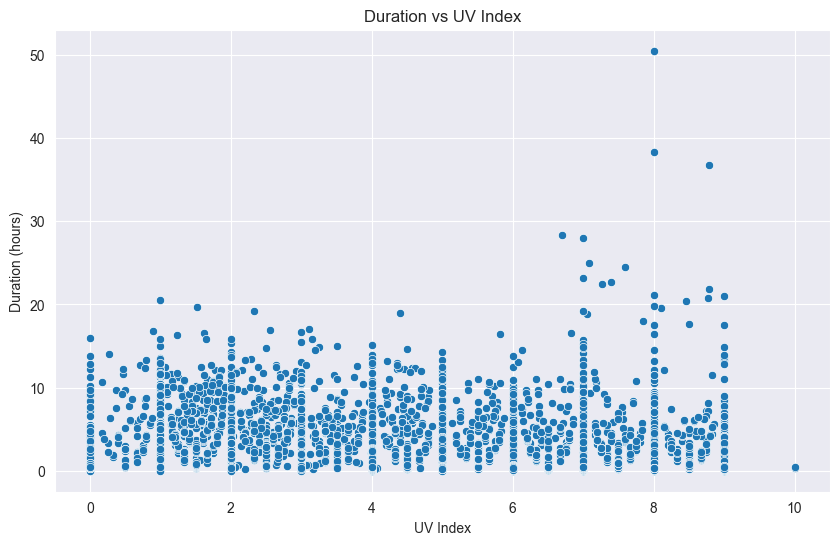

In [16]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='day_uvindex', y='duration_hours')
plt.title('Duration vs UV Index')
plt.xlabel('UV Index')
plt.ylabel('Duration (hours)')
plt.show()

3. The scatter plot illustrates the relationship between the day's UV index and the duration of events. By observing the distribution of the dots, we can get an idea of whether there is any correlation or pattern between these two variables.

A large cluster of events has relatively short durations (mostly below 15 hours) across the entire range of the UV index (from 0 to 10). This suggests that short-duration events are common regardless of the UV index.
There doesn't appear to be a strong linear correlation between the day's UV index and event duration for the majority of the data points. The dots are scattered rather widely, indicating no clear upward or downward trend as the UV index increases.
There are some events with longer durations (above 15 hours), but they seem less frequent and occur across different UV index ranges.
There are a few potential outliers with significantly longer durations (e.g., around 38 and 50 hours) at moderate to high UV index levels.

Also we can conclude that dependence between Solar Radiation, UV index and Dew Point is linear, both graphics look the same.

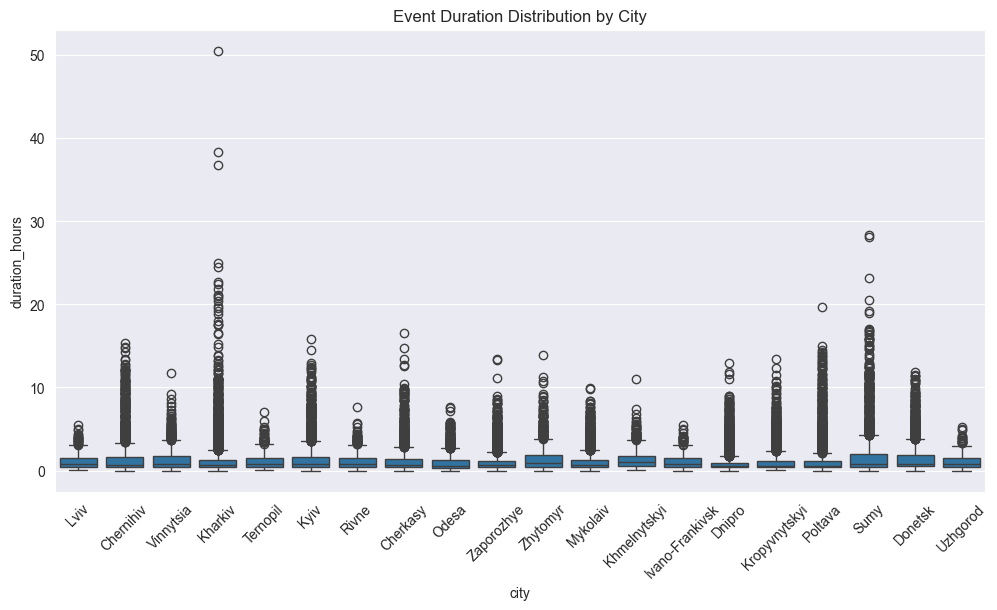

In [17]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='city', y='duration_hours')
plt.title('Event Duration Distribution by City')
plt.xticks(rotation=45)
plt.show()

4. The boxplot illustrates the distribution of event durations for each of the listed cities. By comparing the boxplots, we can analyze and compare the central tendency, spread, and presence of outliers in event durations across different cities.

The median event duration (the line inside each box) varies across the cities. Some cities, like Kharkiv and Poltava, appear to have slightly higher median event durations compared to others. Cities like Donetsk and Luhansk seem to have relatively low median durations.

The height of the boxes, representing the IQR (the range between the 25th and 75th percentiles), indicates the variability in the middle 50% of event durations within each city. Cities with taller boxes, such as Kharkiv and Sumy, show a greater spread in the typical event durations compared to cities with shorter boxes, like Donetsk and Luhansk.

The length of the whiskers provides insight into the overall range of event durations, excluding outliers. Longer whiskers suggest a wider range of typical durations. For instance, Kharkiv and Sumy have relatively long upper whiskers, indicating some events with considerably longer durations within the typical range.


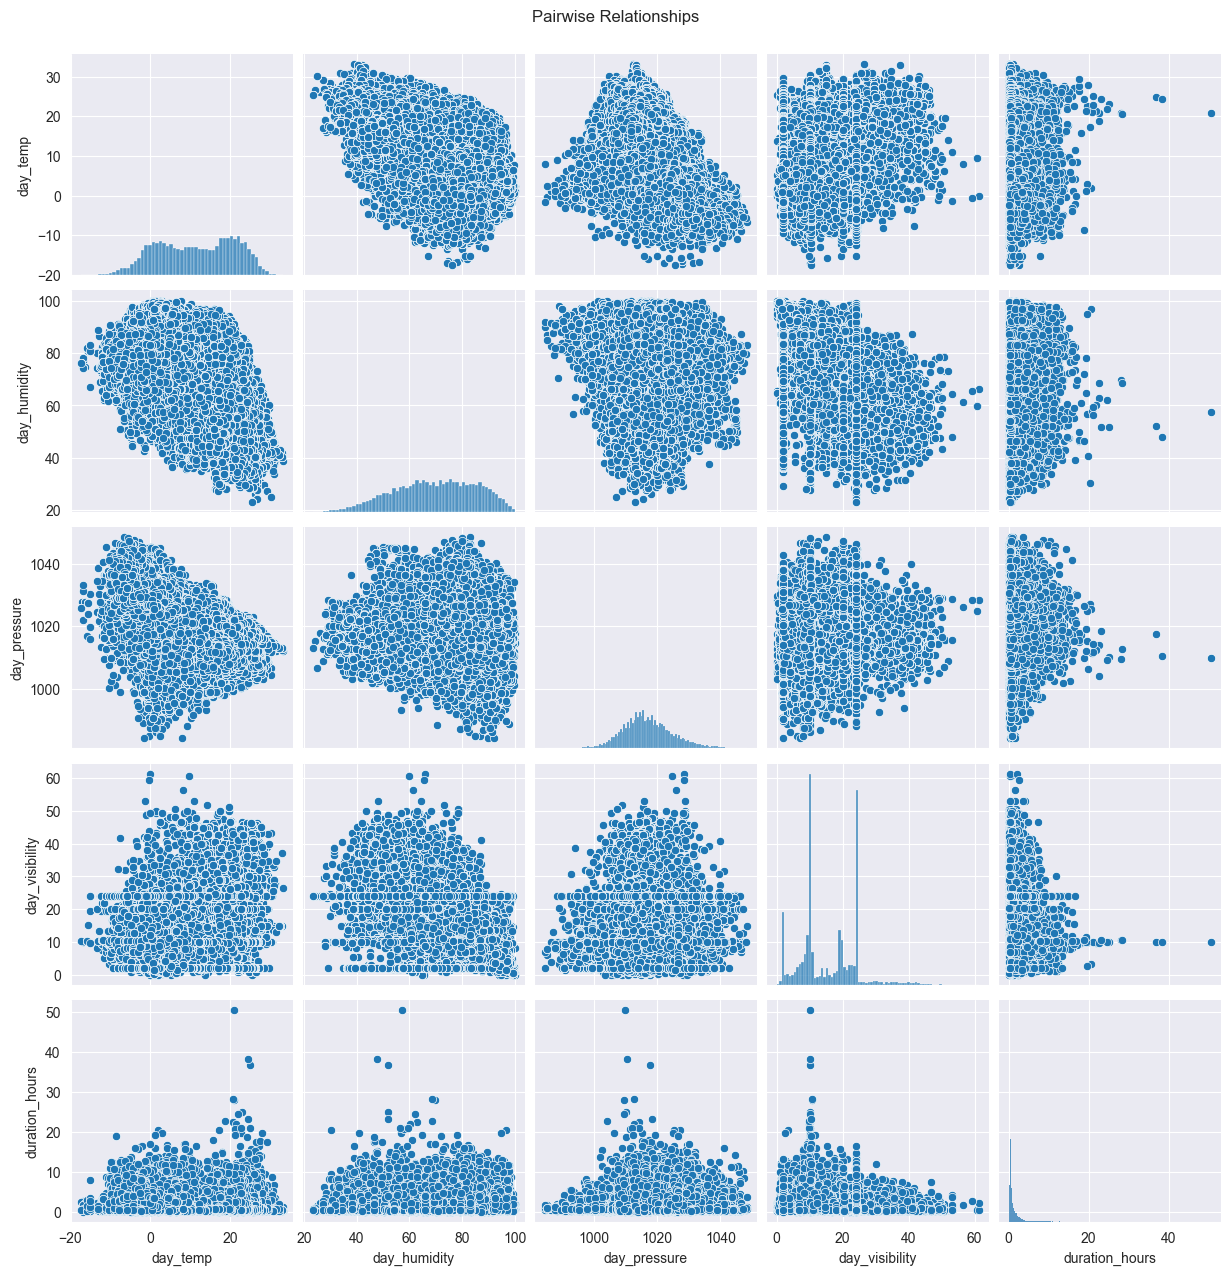

In [18]:
sns.pairplot(df[["day_temp", "day_humidity", "day_pressure", "day_visibility", "duration_hours"]])
plt.suptitle('Pairwise Relationships', y=1.02)
plt.show()

5. The pair plot provides a quick visual overview of the pairwise relationships and individual distributions of the selected weather variables and event duration.

Event duration (duration_hours) is heavily skewed towards shorter values, as seen in its diagonal histogram and its distribution in the scatter plots against other variables.
No strong linear correlations are immediately apparent between duration_hours and the weather variables based on the scattered distributions.
There might be some weak or non-linear relationships that would require further statistical analysis. For example, the relationship between day_humidity and day_visibility hints at a possible weak negative correlation.
The individual distributions of the weather variables show different characteristics (e.g., temperature is somewhat normal, visibility is skewed).